In [48]:
# import zipfile

# with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
#     zip_ref.extractall('Brain_Tumors_256_by_256')

In [28]:
# import os
# import shutil

# base_dir = 'Brain_Tumor_400_Images'
# classes = ['axial_t1wce_2_class', 'coronal_t1wce_2_class', 'sagittal_t1wce_2_class']
# subfolders = ['test', 'train']

# # Create new directories for images and labels with train and test subfolders
# new_image_dir = os.path.join(base_dir, 'combined_images')
# new_label_dir = os.path.join(base_dir, 'combined_labels')

# for folder in ['train', 'test']:
#     os.makedirs(os.path.join(new_image_dir, folder), exist_ok=True)
#     os.makedirs(os.path.join(new_label_dir, folder), exist_ok=True)

# # Function to move files with renaming to avoid conflicts
# def move_files(src_dir, dest_dir, class_prefix, subfolder):
#     for filename in os.listdir(src_dir):
#         new_filename = f"{class_prefix}_{filename}"
#         shutil.move(os.path.join(src_dir, filename), os.path.join(dest_dir, subfolder, new_filename))

# # Move and rename files from each class
# for class_name in classes:
#     for subfolder in subfolders:
#         # Directories for images and labels of each class
#         image_dir = os.path.join(base_dir, class_name, 'images', subfolder)
#         label_dir = os.path.join(base_dir, class_name, 'labels', subfolder)

#         # Move and rename image and label files
#         move_files(image_dir, new_image_dir, class_name, subfolder)
#         move_files(label_dir, new_label_dir, class_name, subfolder)

# print("Files successfully moved and organized into train and test sets.")


Files successfully moved and organized into train and test sets.


# Detection 

## Random Print images from the Kaggle Dataset

[Yolo OD dataset](https://www.kaggle.com/code/davidbroberts/brain-tumor-yolo-od-train)

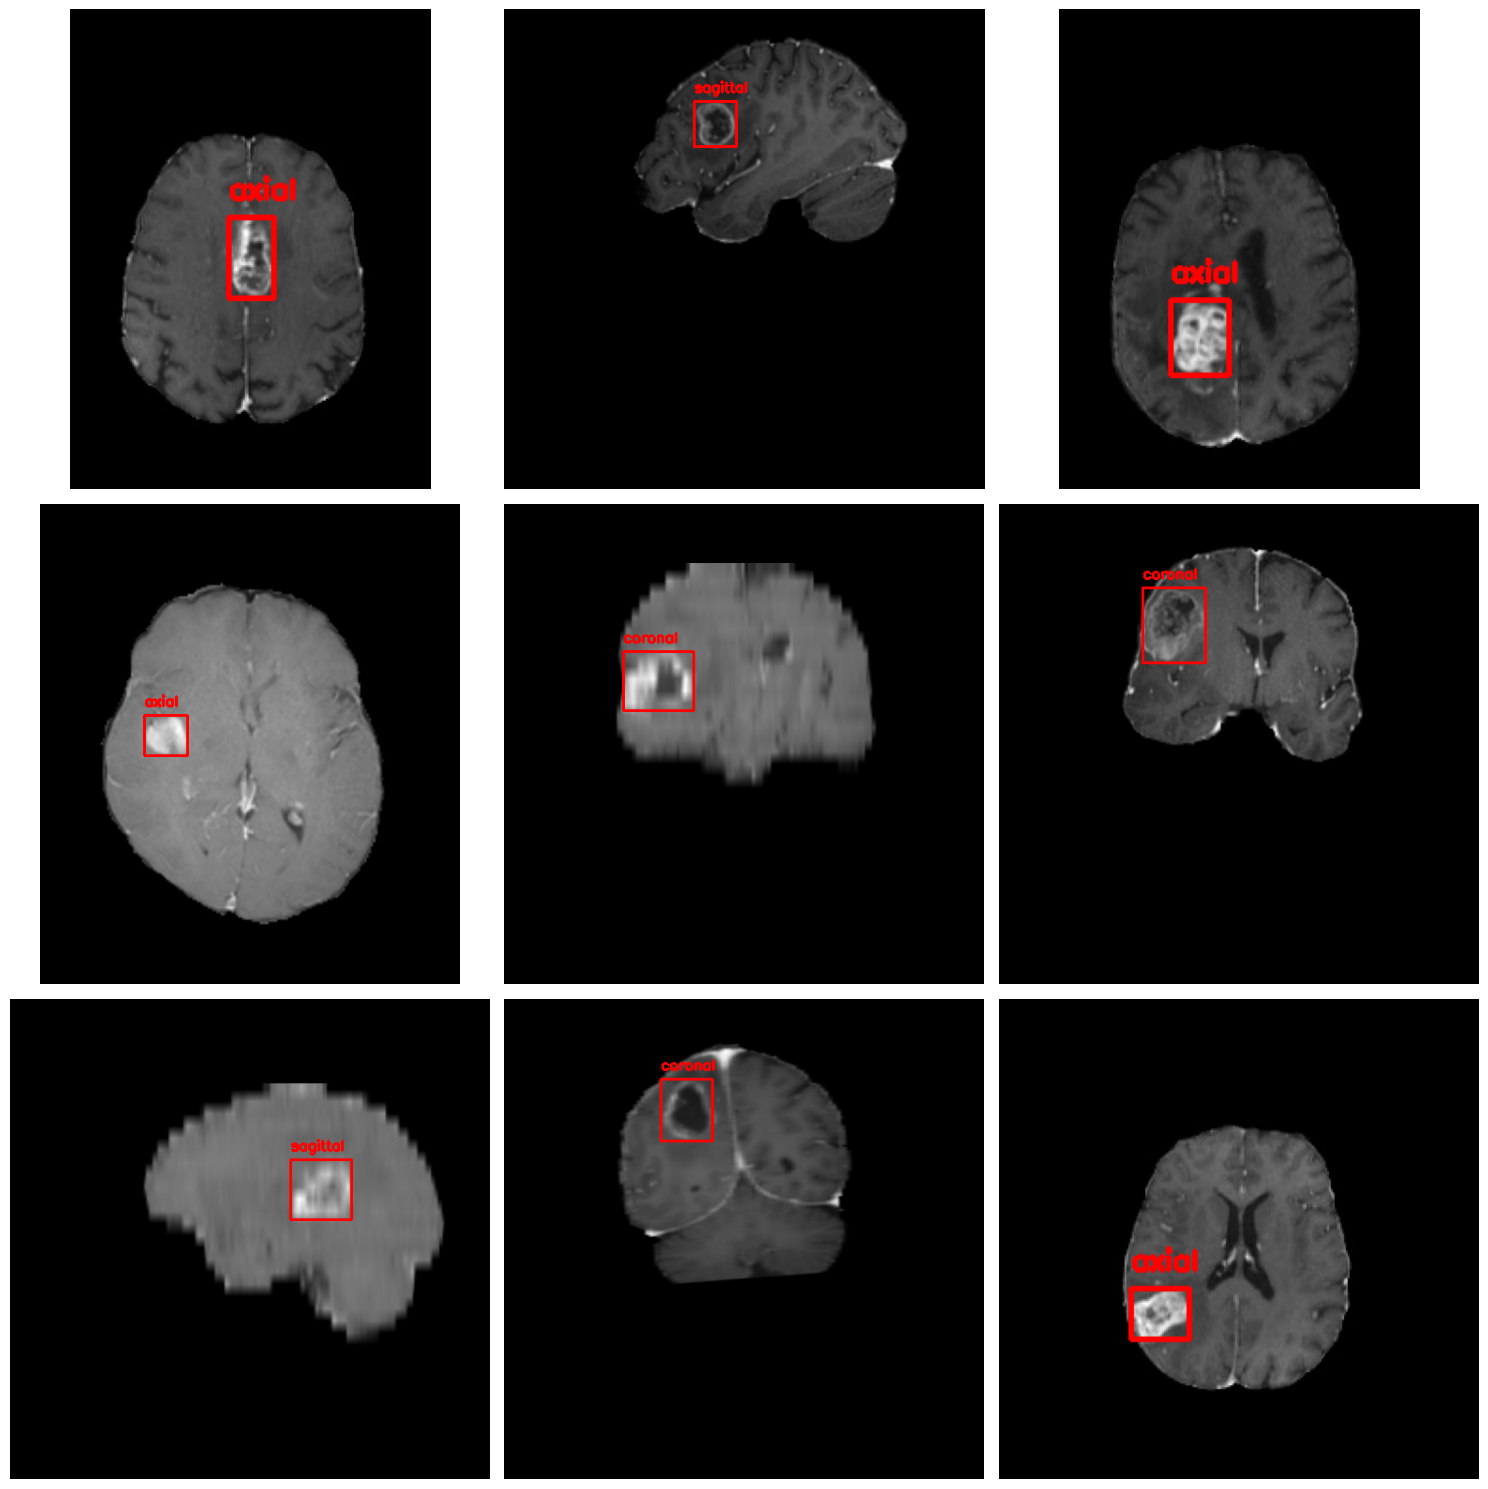

In [35]:
import cv2
import matplotlib.pyplot as plt
import os
import random

def draw_bounding_box(img, labels, class_name):
    for label in labels:
        # Parse label
        _, x_center, y_center, width, height = map(float, label.split())

        # Convert to pixel coordinates
        x_center, y_center, width, height = x_center * img.shape[1], y_center * img.shape[0], width * img.shape[1], height * img.shape[0]
        x_min, y_min = int(x_center - width / 2), int(y_center - height / 2)

        # Draw bounding box and add class name
        cv2.rectangle(img, (x_min, y_min), (int(x_min + width), int(y_min + height)), (255, 0, 0), 2)
        cv2.putText(img, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return img

# Directory paths
base_dir = 'Brain_Tumor_400_Images'
image_dir = os.path.join(base_dir, 'combined_images/train')
label_dir = os.path.join(base_dir, 'combined_labels/train')

# Get random image files
image_files = os.listdir(image_dir)
random_images = random.sample(image_files, 9)

# Set up plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, img_file in enumerate(random_images):
    # Extract class name from filename
    class_name = img_file.split('_')[0]

    # Paths for image and label
    image_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))

    # Load image and labels
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Draw bounding box
    img_with_boxes = draw_bounding_box(img, labels, class_name)

    # Display the image
    axes[i].imshow(img_with_boxes)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [2]:
from ultralytics import YOLO

In [ ]:
# Assuming a YOLOv8 framework is available
from ultralytics import YOLO


model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

results = model.train(data='Brain_Tumor_400_Images/combined.yaml', epochs=10, imgsz=640) ##Using the coco128 datataset from https://ultralytics.com/assets/coco128.zip

Ultralytics YOLOv8.0.219 🚀 Python-3.9.18 torch-2.1.1+cu121 CUDA:0 (NVIDIA L4, 22488MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Brain_Tumor_400_Images/combined.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, f

train: Scanning /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/labels/train.cache... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<?, ?it/s]
val: Scanning /home/jupyter/msaai-all/Vision/module7/Brain_Tumor_400_Images/labels/test.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train19
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.2G       1.46       4.46      1.337         17        640:  50%|█████     | 28/56 [00:04<00:02,  9.37it/s]

# Testing the model with the 256x256 Tumor Classification dataseta

In [20]:
tumor = model("/home/jupyter/msaai-all/Vision/module7/Brain_Tumors_256_by_256/Data/glioma_tumor/G_488.jpg",save_txt=True, save_conf=True)


image 1/1 /home/jupyter/msaai-all/Vision/module7/Brain_Tumors_256_by_256/Data/glioma_tumor/G_488.jpg: 640x640 1 negative, 2 positives, 9.3ms
Speed: 3.1ms preprocess, 9.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train199
1 label saved to runs/detect/train199/labels


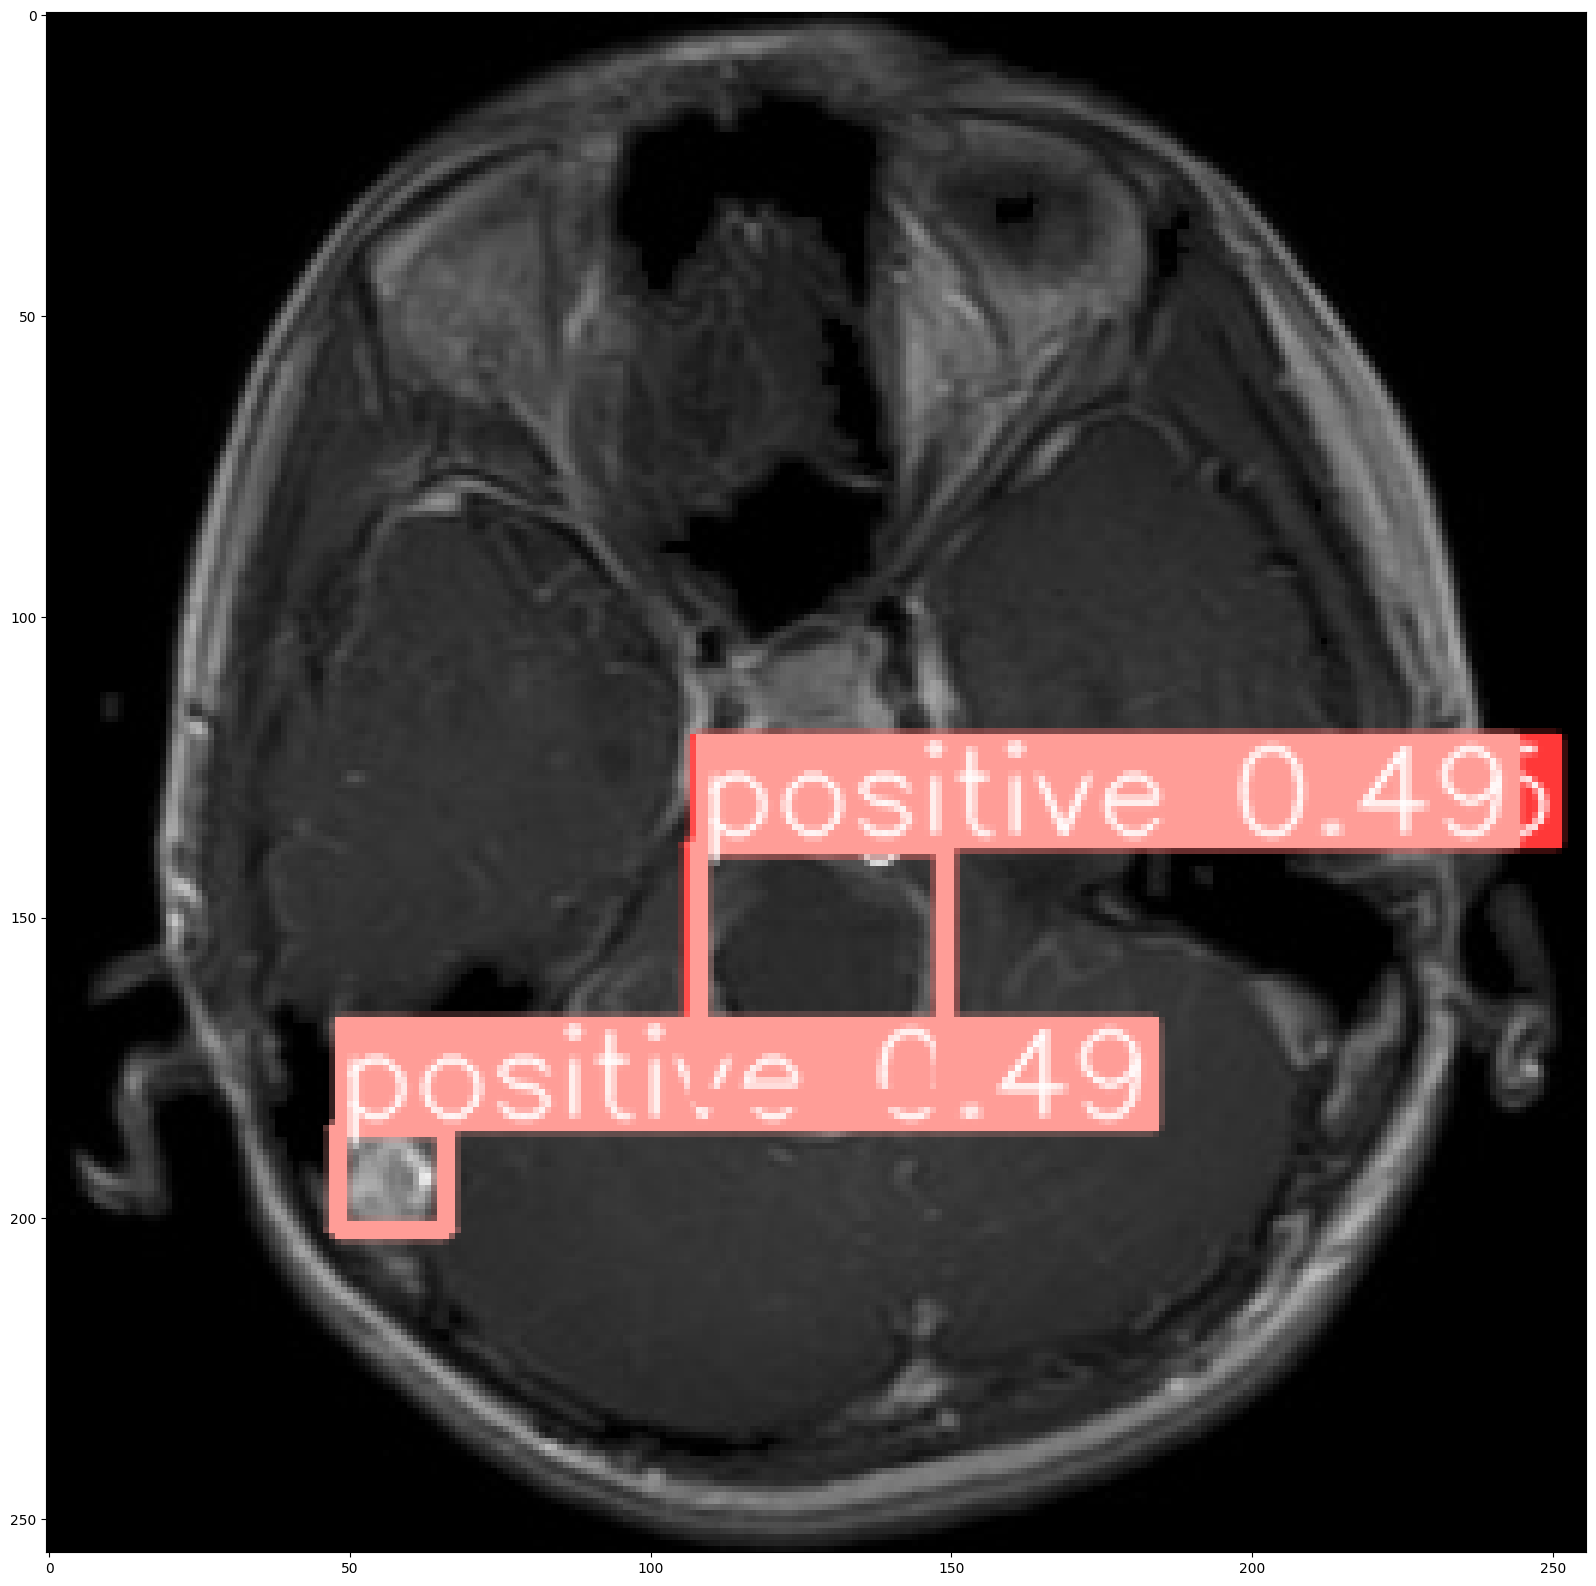

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,20))

for r in tumor:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    plt.imshow(np.array(im))
    im.save('results.jpg')  # save image
